In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

from src.preproces import *

In [9]:
file_path = '/nird/home/johannef/Masterthesis_S23 DataFiles/land_masked_annual_climatalogies/rx5dayETCCDI/ssp126/rx5dayETCCDI_yr_ACCESS-ESM1-5_ssp126_r1i1p1f1_2015-2100_landmasked.nc'

file_handler = Handle_Files()

test_file = file_handler.read_netcdf_to_xr(file_path=file_path)

test_file

<xarray.Dataset>
Dimensions:       (year: 86, lat: 145, lon: 192)
Coordinates:
  * lon           (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat           (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
    height        float64 ...
  * year          (year) int64 2015 2016 2017 2018 2019 ... 2097 2098 2099 2100
Data variables:
    rx5dayETCCDI  (year, lat, lon) float32 ...

In [3]:
def plot_on_globe(data,
                  center_lon=0, center_lat=20,
                  cmap='viridis',
                  title=None, 
                  v_min=None,
                  v_max=None):
    """
    Plot data on a globe.

    Parameters:
    - data (xr.DataArray): The data to be plotted. Horizontal 2D data at a single time step.
    - center_lat (float): The latitude for the center of the plot.
    - center_lon (float): The longitude for the center of the plot.
    - cmap (str or Colormap): The colormap to be used for the plot.
    - title (str): The title of the plot.
    - v_min (float): The minimum value for the colorbar.
    - v_max (float): The maximum value for the colorbar.
    """
    
    p = data.plot(
        subplot_kws=dict(projection=ccrs.Orthographic(center_lon, center_lat), facecolor="gray"),
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        vmin=v_min,
        vmax=v_max
    )
    p.axes.set_global()
    p.axes.coastlines()

    if title is None:
        title = "Globe plot"
    plt.title(title)

    plt.show()


In [6]:
test_file.txxETCCDI.isel(year=0).values

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.6382996 , 0.61342776, 0.60231936, ..., 0.6625    , 0.6689087 ,
        0.6678406 ],
       [0.69744265, 1.0285889 , 0.70406497, ..., 1.0299011 , 1.0287415 ,
        1.0294129 ],
       [0.887323  , 0.887323  , 0.887323  , ..., 0.887323  , 0.887323  ,
        0.887323  ]], dtype=float32)

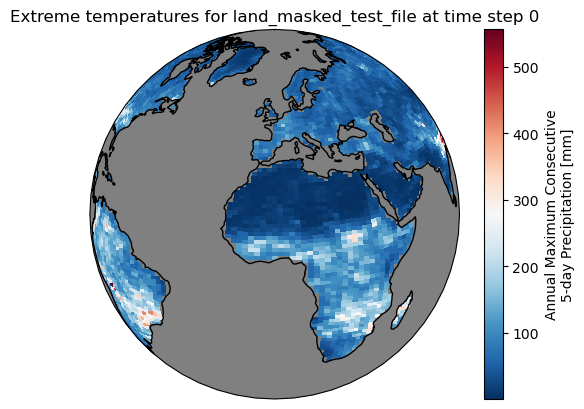

In [10]:
plot_on_globe(test_file.rx5dayETCCDI.isel(year=0), 
              cmap='RdBu_r',
              title='Extreme temperatures for land_masked_test_file at time step 0')